In [1]:
import pandas as pd
from pathlib import Path

data_dir = Path(r"C:\Users\Lenovo\Downloads\BT4222 PROJ")

# Gather all Parquet files in the directory
files = list(data_dir.glob("*.parquet"))

# Load each Parquet file and concatenate them into a single DataFrame
df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)

# Display the first few rows to understand the format
print("The length of Wikipedia STEM articles")
print(len(df))
print("The shape of Wikipedia STEM articles")
print(df.shape)
print(df.dtypes)
df.head()

The length of Wikipedia STEM articles
131049
The shape of Wikipedia STEM articles
(131049, 3)
text     object
url      object
title    object
dtype: object


,text,url,title
0,"Becurtovirus is a genus of viruses, in the fam...",https://en.wikipedia.org/wiki/Becurtovirus,Becurtovirus
1,Cyprinivirus is a genus of viruses in the orde...,https://en.wikipedia.org/wiki/Cyprinivirus,Cyprinivirus
2,"Glossinavirus is a genus of viruses, in the fa...",https://en.wikipedia.org/wiki/Glossinavirus,Glossinavirus
3,"Ichtadenovirus is a genus of viruses, in the f...",https://en.wikipedia.org/wiki/Ichtadenovirus,Ichtadenovirus
4,"Lambdatorquevirus is a genus of viruses, in th...",https://en.wikipedia.org/wiki/Lambdatorquevirus,Lambdatorquevirus


In [2]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows if any
print("Duplicate rows:")
print(duplicates)

# Count of duplicate rows
print("Number of duplicate rows:", len(duplicates))

Duplicate rows:
Empty DataFrame
Columns: [text, url, title]
Index: []
Number of duplicate rows: 0


In [3]:
missing_descriptions = df['text'].isnull().sum()
empty_descriptions = (df['text'].str.strip() == '').sum()
print("Number of missing text:", missing_descriptions)
print("Number of empty text:", empty_descriptions)

Number of missing text: 0
Number of empty text: 0


Word Count Statistics for Description Column:
count    131049.00000
mean        707.08506
std        1139.51811
min          12.00000
25%         146.00000
50%         323.00000
75%         799.00000
max       68741.00000
Name: text, dtype: float64


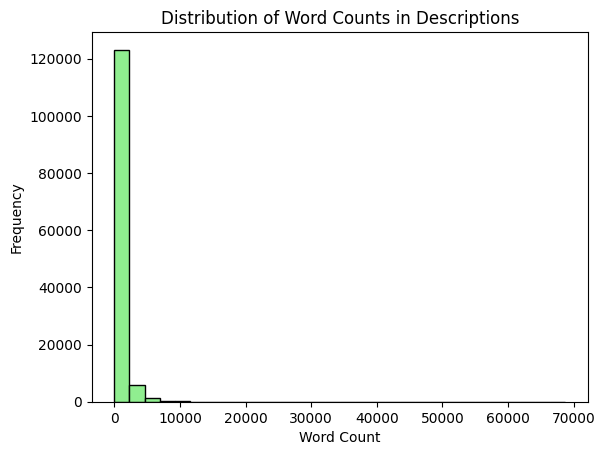

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
word_counts = df['text'].dropna().apply(lambda x: len(x.split()))

# Display the word count statistics
word_count_stats = word_counts.describe()
print("Word Count Statistics for Description Column:")
print(word_count_stats)
word_counts = df['text'].dropna().apply(lambda x: len(x.split()))
plt.hist(word_counts, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Word Counts in Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [5]:
df.to_csv('wikidata.csv', index=False)